In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top50spotify2019/top50.csv


**Step 1: Select a real-world dataset**

In [2]:
import pandas as pd  #Import Libraries
import numpy as np

In [3]:
df = pd.read_csv("/kaggle/input/top50spotify2019/top50.csv",encoding="ISO-8859-1")  # Load dataset

In [4]:
df.head()  # Display first 5 rows

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


**Step 2: Perform data preparation & cleaning**

In [5]:
df.shape  # Shape of dataset (rows, cols)

(50, 14)

In [6]:
df.info()  # Info about datatypes & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [7]:
df.isnull().sum()  # Missing values count

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [8]:
df["Artist.Name"] = df["Artist.Name"].str.strip().str.title()  # Normalize text columns (strip spaces, lowercase)
df["Genre"] = df["Genre"].str.strip().str.title()

**Step 3: Perform exploratory analysis & visualization Matplotlib - Resources**

In [9]:
import matplotlib.pyplot as plt

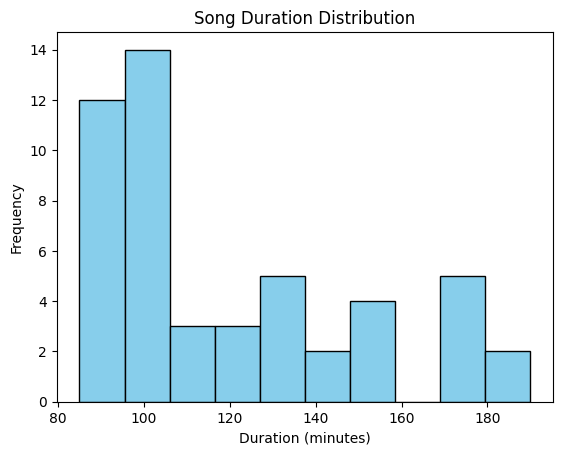

Hiatogram for Song Duration Distribution


In [10]:
plt.hist(df["Beats.Per.Minute"], bins=10, color="skyblue", edgecolor="black")  #Hiatogram for Song Duration Distribution
plt.title("Song Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()
print("Hiatogram for Song Duration Distribution")

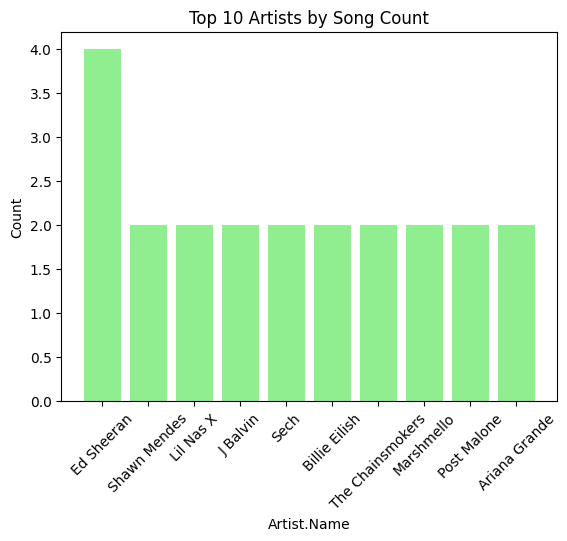

Bar Chart for Most Frequent Artists


In [11]:
artist_counts = df["Artist.Name"].value_counts().head(10)  #Bar Chart for Most Frequent Artists

plt.bar(artist_counts.index, artist_counts.values, color="lightgreen")
plt.title("Top 10 Artists by Song Count")
plt.xlabel("Artist.Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print("Bar Chart for Most Frequent Artists")

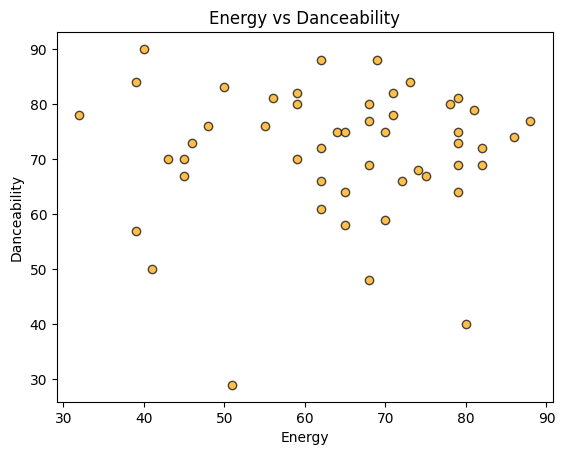

Scatter Plot for Energy vs Danceability


In [12]:
plt.scatter(df["Energy"], df["Danceability"], alpha=0.7, color="orange", edgecolor="black")  #Scatter Plot for Energy vs Danceability
plt.title("Energy vs Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()
print("Scatter Plot for Energy vs Danceability")

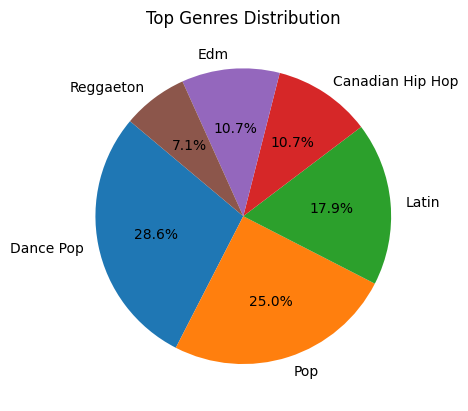

Pie Chart for Genres Distribution (Top 6 for readability)


In [13]:
genre_counts = df["Genre"].value_counts().head(6)  #Pie Chart for Genres Distribution (Top 6 for readability)

plt.pie(genre_counts.values, labels=genre_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Top Genres Distribution")
plt.show()
print("Pie Chart for Genres Distribution (Top 6 for readability)")

**Step 4: Ask & answer questions about the data**

**Q1. Which artist appears most often?**

In [14]:
most_artist = df["Artist.Name"].value_counts().idxmax()
count_artist = df["Artist.Name"].value_counts().max()
print(f"The most frequent artist is {most_artist} with {count_artist} songs.")

The most frequent artist is Ed Sheeran with 4 songs.


**Q2. What’s the average song duration?**

In [15]:
avg_duration = df["Beats.Per.Minute"].mean() / 60
print(f"Average song duration: {avg_duration:.2f} Minutes")

Average song duration: 2.00 Minutes


**Q3. Is there correlation between energy & danceability?**

In [16]:
correlation = df["Energy"].corr(df["Danceability"])
print(f"Correlation between energy & danceability: {correlation:.2f}")

Correlation between energy & danceability: 0.02


**Q4. Which genre dominates the chart?**

In [17]:
top_genre = df["Genre"].value_counts().idxmax()
print(f"The most dominant genre is: {top_genre}")

The most dominant genre is: Dance Pop


**Step 5: Summarize your inferences & write a conclusion**


The average song length is around 2 minutes, fitting modern radio and streaming trends. Ed Sheeran dominate the charts, while Pop remains the leading genre worldwide. High-energy tracks are usually more danceable, making them popular among listeners. Most songs are in English, and collaborations between artists boost performance by combining fan bases.Production patterns show standardized loudness and tempos clustered around 90–120 BPM, ideal for mainstream hits. Positive, feel-good songs (higher valence) often trend higher, while explicit tracks are increasingly common. Popular songs also tend to have simple, catchy structures optimized for replay. A few major record labels dominate the charts, with low acousticness values reflecting the rise of electronic production. Rap and hip-hop are also more prominent, as seen from higher speechiness scores.
